### Trabajo Práctico
#### *Minería de Datos*

#### **Carga de datos**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE

In [5]:
datos = pd.read_csv('SmartFarmingCropYield.csv')

In [6]:
datos.head()

tipoCultivo   humedadSuelo(%)   pHSuelo   temperatura(°C)  \
0       Trigo             35.95      5.99             17.79   
1        Soja             19.74      7.24             30.18   
2       Trigo             29.32      7.16             27.37   
3        Maiz             17.33      6.03             33.73   
4        Soja             36.28      7.04             21.80   

    precipitacion(mm)   humedad(%)   horasLuzSolar  tipoRiego  \
0               75.62        77.03            7.27        NaN   
1               89.91        61.13            5.67   Aspersor   
2              265.43        68.87            8.23      Goteo   
3              212.01        70.46            5.03   Aspersor   
4              123.38        47.91            4.02     Manual   

   tipoFertilizante   mlPesticida   diasTotales   rendimientoKg_hectarea  \
0          Organico          6.34           122                  4408.07   
1        Inorganico          9.60           112                  5389.98   
2             Mixto         15.26           144                  2931.16   
3          Organico         25.80           134                  4227.80   
4             Mixto         39.29           145                  4501.20   

    indiceNDVI  estadoEnfermedadesCultivo  
0         0.63                       Leve  
1         0.58                        NaN  
2         0.80                       Leve  
3         0.44                        NaN  
4         0.76                        NaN

#### **Análisis Exploratorio de Datos**

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tipoCultivo                 311 non-null    object 
 1    humedadSuelo(%)            311 non-null    float64
 2    pHSuelo                    311 non-null    float64
 3    temperatura(°C)            311 non-null    float64
 4    precipitacion(mm)          311 non-null    float64
 5    humedad(%)                 311 non-null    float64
 6    horasLuzSolar              311 non-null    float64
 7    tipoRiego                  220 non-null    object 
 8    tipoFertilizante           311 non-null    object 
 9    mlPesticida                311 non-null    float64
 10   diasTotales                311 non-null    int64  
 11   rendimientoKg_hectarea     311 non-null    float64
 12   indiceNDVI                 311 non-null    float64
 13   estadoEnfermedadesCultivo  228 non

**Distribución de columnas con valores numéricos**

array([[<Axes: title={'center': ' humedadSuelo(%)'}>,
        <Axes: title={'center': ' pHSuelo'}>,
        <Axes: title={'center': ' temperatura(°C)'}>],
       [<Axes: title={'center': ' precipitacion(mm)'}>,
        <Axes: title={'center': ' humedad(%)'}>,
        <Axes: title={'center': ' horasLuzSolar'}>],
       [<Axes: title={'center': ' mlPesticida'}>,
        <Axes: title={'center': ' diasTotales'}>,
        <Axes: title={'center': ' rendimientoKg_hectarea'}>],
       [<Axes: title={'center': ' indiceNDVI'}>, <Axes: >, <Axes: >]],
      dtype=object)

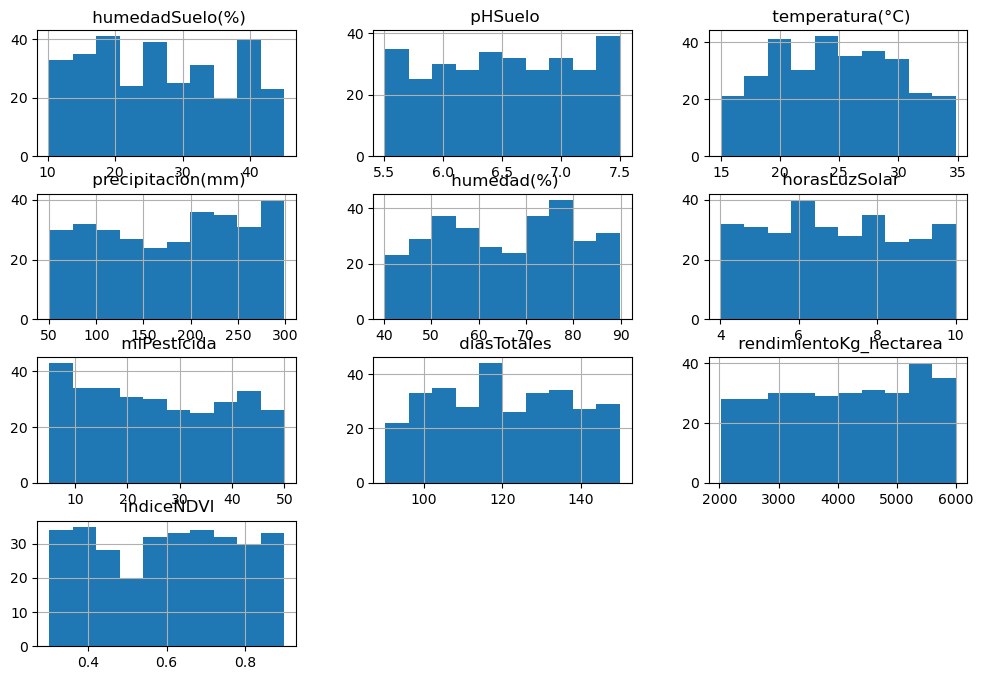

In [11]:
datos.hist(figsize=(12, 8))

**Distrubución de columnas con datos nulos: tipoRiego y estadoEnfermedadesCultivo**

In [13]:
tipo_riego = datos.copy()
tipo_riego[' tipoRiego'] = tipo_riego[' tipoRiego'].fillna('Nulo')

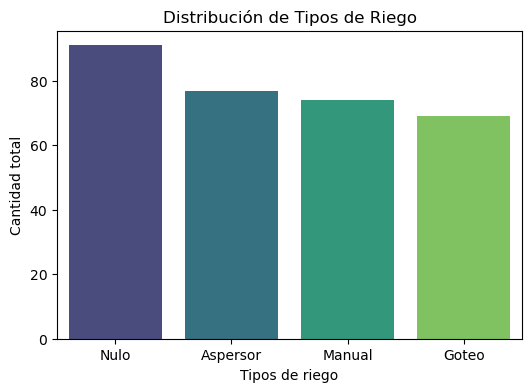

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=tipo_riego, x=' tipoRiego', order=tipo_riego[' tipoRiego'].value_counts().index, palette='viridis')
plt.xlabel('Tipos de riego')
plt.ylabel('Cantidad total')
plt.title('Distribución de Tipos de Riego')
plt.show()    

In [15]:
enferm_cultivo = datos.copy()
enferm_cultivo[' estadoEnfermedadesCultivo'] = enferm_cultivo[' estadoEnfermedadesCultivo'].fillna('Nulo')

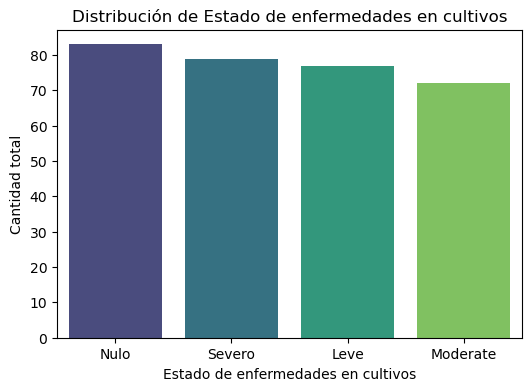

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=enferm_cultivo, x=' estadoEnfermedadesCultivo', order=enferm_cultivo[' estadoEnfermedadesCultivo'].value_counts().index, palette='viridis')
plt.xlabel('Estado de enfermedades en cultivos')
plt.ylabel('Cantidad total')
plt.title('Distribución de Estado de enfermedades en cultivos')
plt.show()

**Visualización de datos en búsqueda de outliers**

In [18]:
col_num = datos[[' humedadSuelo(%)', ' pHSuelo', ' temperatura(°C)',
       ' precipitacion(mm)', ' humedad(%)', ' horasLuzSolar', ' mlPesticida', ' diasTotales',
       ' rendimientoKg_hectarea', ' indiceNDVI']]

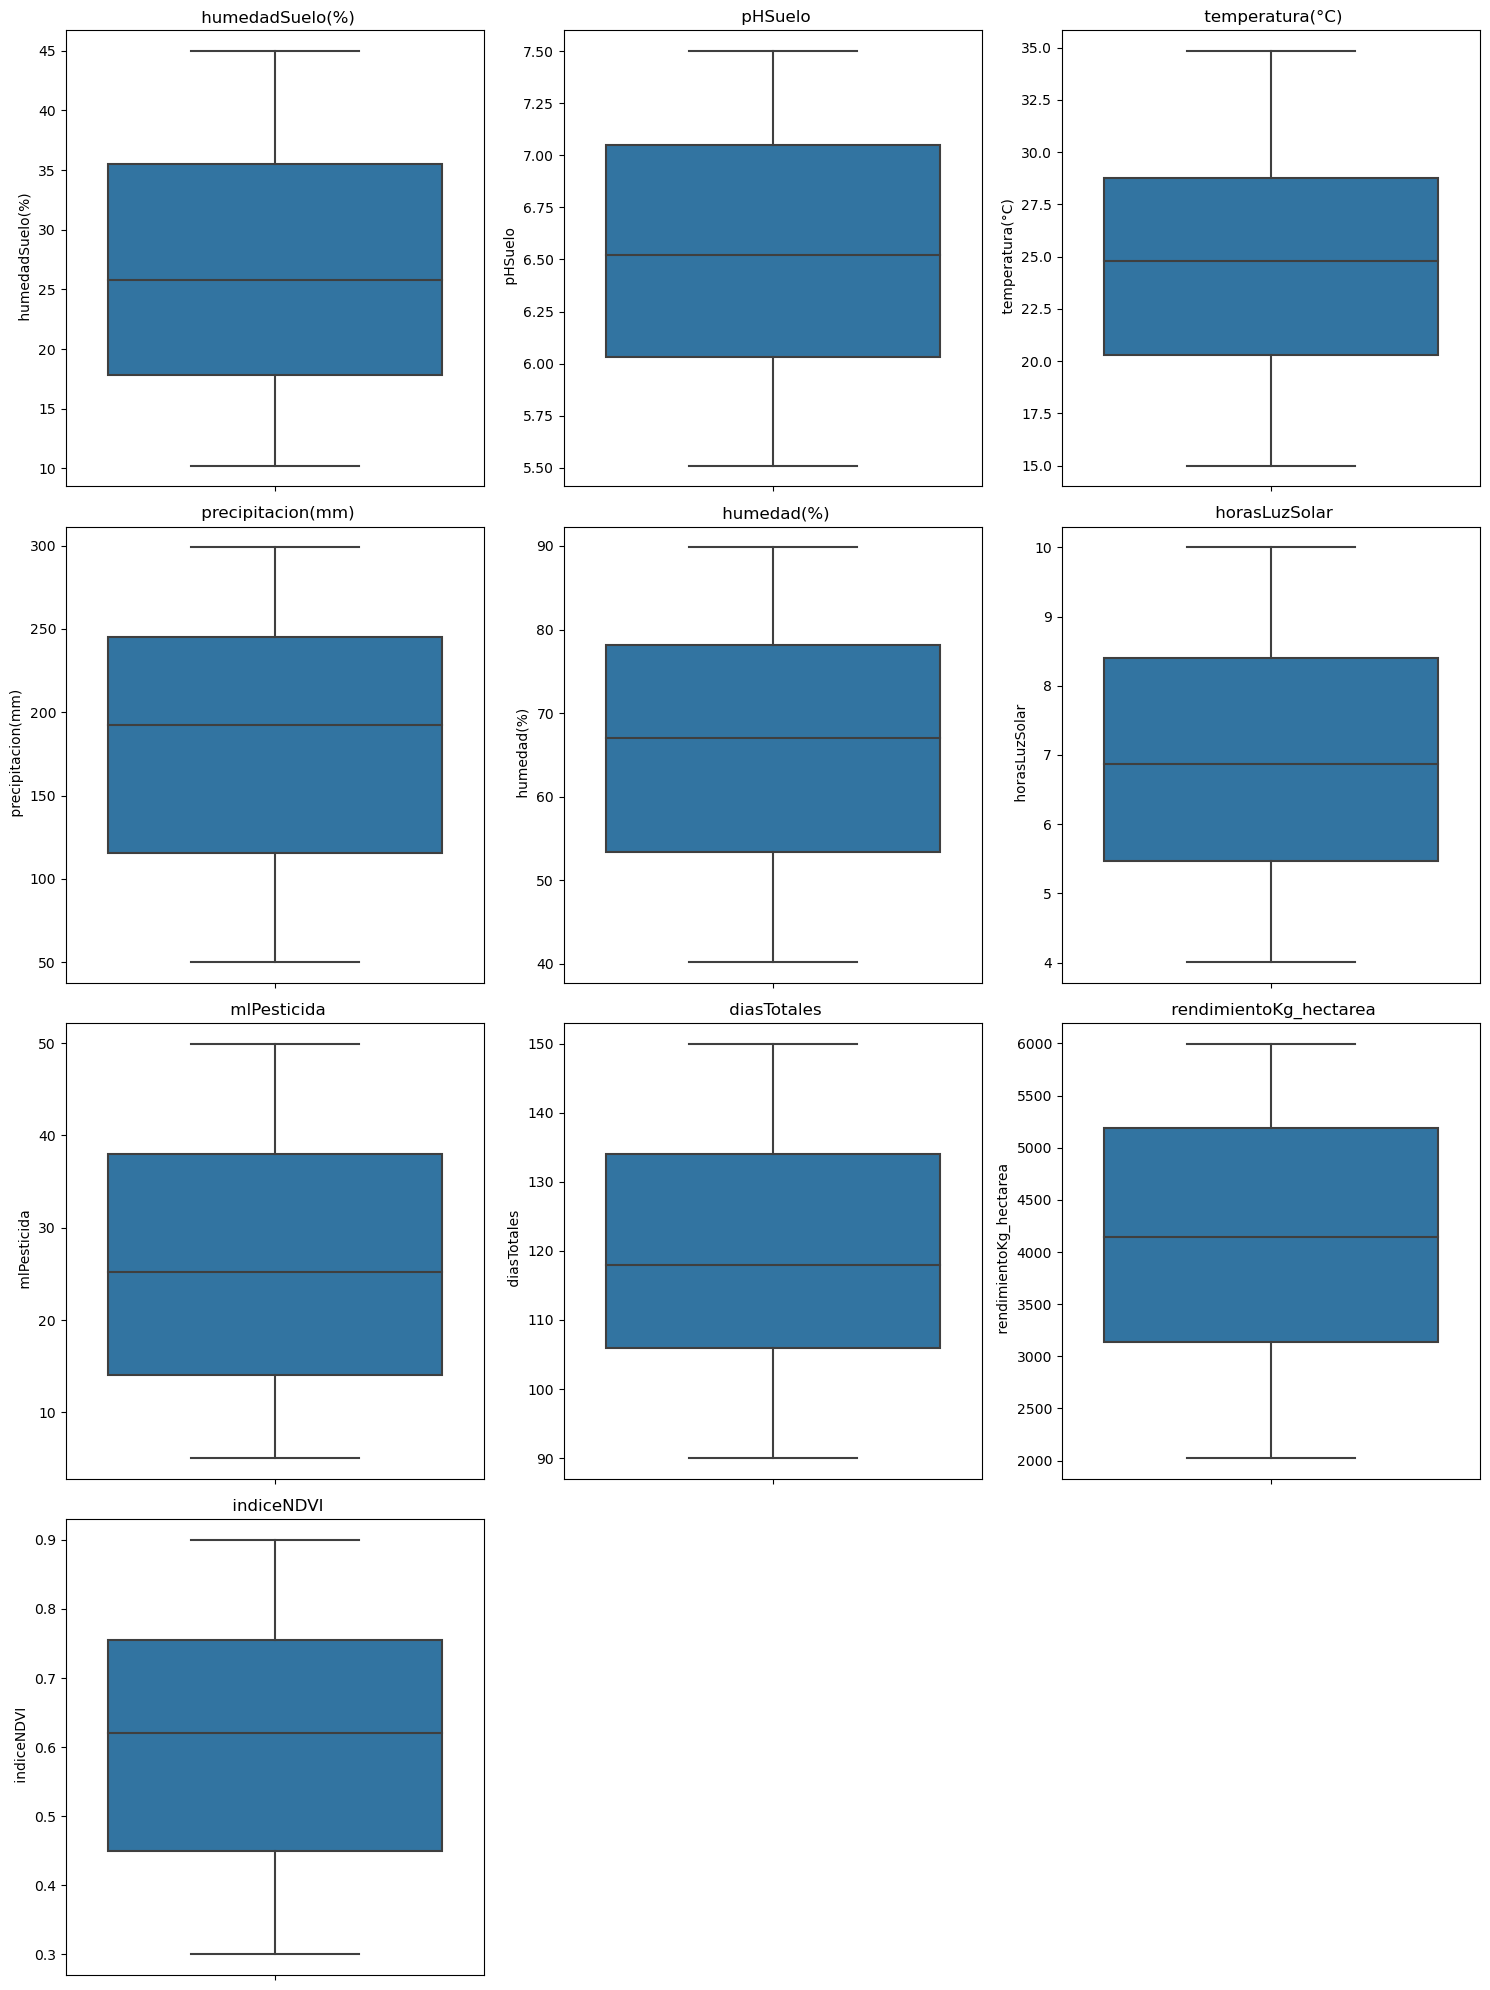

In [19]:
import math
n = len(col_num.columns)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(col_num.columns):
    sns.boxplot(data=col_num, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Limpieza de datos**

Se notaron espacios de más en varios nombres de columnas. Se borran y se evitan caracteres no usuales en los mismos.

In [22]:
datos.columns

Index(['tipoCultivo', ' humedadSuelo(%)', ' pHSuelo', ' temperatura(°C)',
       ' precipitacion(mm)', ' humedad(%)', ' horasLuzSolar', ' tipoRiego',
       ' tipoFertilizante', ' mlPesticida', ' diasTotales',
       ' rendimientoKg_hectarea', ' indiceNDVI', ' estadoEnfermedadesCultivo'],
      dtype='object')

In [23]:
datos.columns = ['tipoCultivo', 'humedadSuelo_porc', 'pHSuelo', 'temperatura_c',
       'precipitacion_mm', 'humedad_porc', 'horasLuzSolar', 'tipoRiego',
       'tipoFertilizante', 'mlPesticida', 'diasTotales',
       'rendimientoKg_hectarea', 'indiceNDVI', 'estadoEnfermedadesCultivo']

In [24]:
print(f'Cantidad de registros sin tipos de riego ni estado de enfermedades en cultivos, dentro de los {len(datos)} disponibles:')
len(datos[datos['tipoRiego'].isna() & datos['estadoEnfermedadesCultivo'].isna()])

Cantidad de registros sin tipos de riego ni estado de enfermedades en cultivos, dentro de los 311 disponibles:


26

Se eliminan los 26 registros captados.

In [26]:
datos_limpios = datos.dropna(subset=['tipoRiego', 'estadoEnfermedadesCultivo'], how='all')

Cantidad de registros a usar a partir de acá:

In [28]:
len(datos_limpios)

285

**Estandarización de datos numéricos**

En la visualización de datos numéricos se notó que las escalas entre las variables son distintas y las distribuciones no son cercanas a la normal. Se elige usar **MinMaxScaler de scikit-learn**.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
datos_limp_num = datos_limpios.copy()

In [33]:
datos_limp_num = datos_limp_num.drop(columns=['tipoCultivo', 'tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'])

In [34]:
scaler = MinMaxScaler()

In [35]:
datos_num_esc = pd.DataFrame(scaler.fit_transform(datos_limp_num), columns=datos_limp_num.columns)

array([[<Axes: title={'center': 'humedadSuelo_porc'}>,
        <Axes: title={'center': 'pHSuelo'}>,
        <Axes: title={'center': 'temperatura_c'}>],
       [<Axes: title={'center': 'precipitacion_mm'}>,
        <Axes: title={'center': 'humedad_porc'}>,
        <Axes: title={'center': 'horasLuzSolar'}>],
       [<Axes: title={'center': 'mlPesticida'}>,
        <Axes: title={'center': 'diasTotales'}>,
        <Axes: title={'center': 'rendimientoKg_hectarea'}>],
       [<Axes: title={'center': 'indiceNDVI'}>, <Axes: >, <Axes: >]],
      dtype=object)

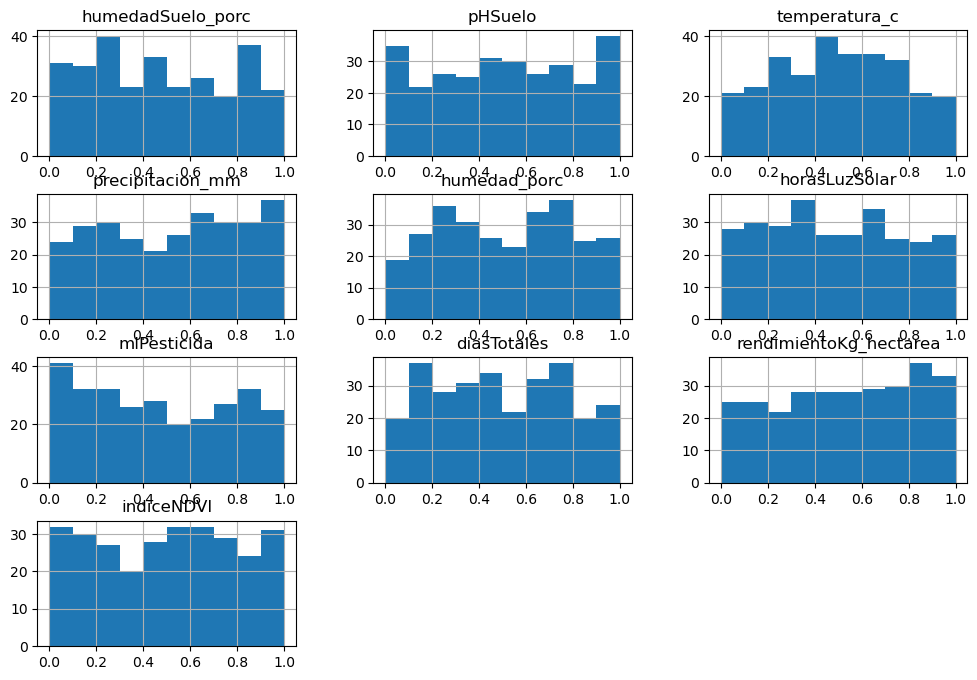

In [36]:
datos_num_esc.hist(figsize=(12, 8))

Se concatenan los datos escalados y las variables categóricas, que no se modificaron.

In [38]:
datos_esc = pd.concat([datos_limpios[['tipoCultivo', 'tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo']].reset_index(drop=True),
    datos_num_esc.reset_index(drop=True)], axis=1)

Teniendo en cuenta que tipoCultivo va a ser la variable objetivo, se opta por apartarla del resto de variables, que aun deben ser imputadas.

In [40]:
y = datos_esc['tipoCultivo']

In [41]:
datos_esc = datos_esc.drop(columns=['tipoCultivo'])

Se procede a eliminar los faltantes de ambas categorias.

In [43]:
datos_esc["tipoRiego"].dropna(inplace=True)
datos_esc["estadoEnfermedadesCultivo"].dropna(inplace=True)

Se crean variables **dummies** por las variables categóricas.

In [45]:
col_categ = ['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo']

In [46]:
datos_esc_dum = pd.get_dummies(datos_esc, columns=col_categ, drop_first=False, dtype=int)

In [47]:
datos_esc_dum.head()

humedadSuelo_porc   pHSuelo  temperatura_c  precipitacion_mm  humedad_porc  \
0           0.739919  0.241206       0.140625          0.102295      0.741786   
1           0.273041  0.869347       0.765121          0.159733      0.421286   
2           0.548963  0.829146       0.623488          0.865228      0.577303   
3           0.203629  0.261307       0.944052          0.650508      0.609353   
4           0.749424  0.768844       0.342742          0.294264      0.154807   

   horasLuzSolar  mlPesticida  diasTotales  rendimientoKg_hectarea  \
0       0.544240     0.028737     0.533333                0.599917   
1       0.277129     0.101359     0.366667                0.846956   
2       0.704508     0.227445     0.900000                0.228343   
3       0.170284     0.462241     0.733333                0.554563   
4       0.001669     0.762753     0.916667                0.623348   

   indiceNDVI  tipoRiego_Aspersor  tipoRiego_Goteo  tipoRiego_Manual  \
0    0.550000                   0                0                 0   
1    0.466667                   1                0                 0   
2    0.833333                   0                1                 0   
3    0.233333                   1                0                 0   
4    0.766667                   0                0                 1   

   tipoFertilizante_Inorganico  tipoFertilizante_Mixto  \
0                            0                       0   
1                            1                       0   
2                            0                       1   
3                            0                       0   
4                            0                       1   

   tipoFertilizante_Organico  estadoEnfermedadesCultivo_Leve  \
0                          1                               1   
1                          0                               0   
2                          0                               1   
3                          1                               0   
4                          0                               0   

   estadoEnfermedadesCultivo_Moderate  estadoEnfermedadesCultivo_Severo  
0                                   0                                 0  
1                                   0                                 0  
2                                   0                                 0  
3                                   0                                 0  
4                                   0                                 0

In [48]:
datos_final = datos_esc_dum.copy()

**Versión final de dataset**

In [80]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   humedadSuelo_porc                   285 non-null    float64
 1   pHSuelo                             285 non-null    float64
 2   temperatura_c                       285 non-null    float64
 3   precipitacion_mm                    285 non-null    float64
 4   humedad_porc                        285 non-null    float64
 5   horasLuzSolar                       285 non-null    float64
 6   mlPesticida                         285 non-null    float64
 7   diasTotales                         285 non-null    float64
 8   rendimientoKg_hectarea              285 non-null    float64
 9   indiceNDVI                          285 non-null    float64
 10  tipoRiego_Aspersor                  285 non-null    int32  
 11  tipoRiego_Goteo                     285 non-n

### **PCA**

In [83]:
from sklearn.decomposition import PCA

In [85]:
x = datos_final.copy()

In [87]:
pca = PCA(n_components=None)

In [89]:
pca.fit(x)

PCA()

In [91]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

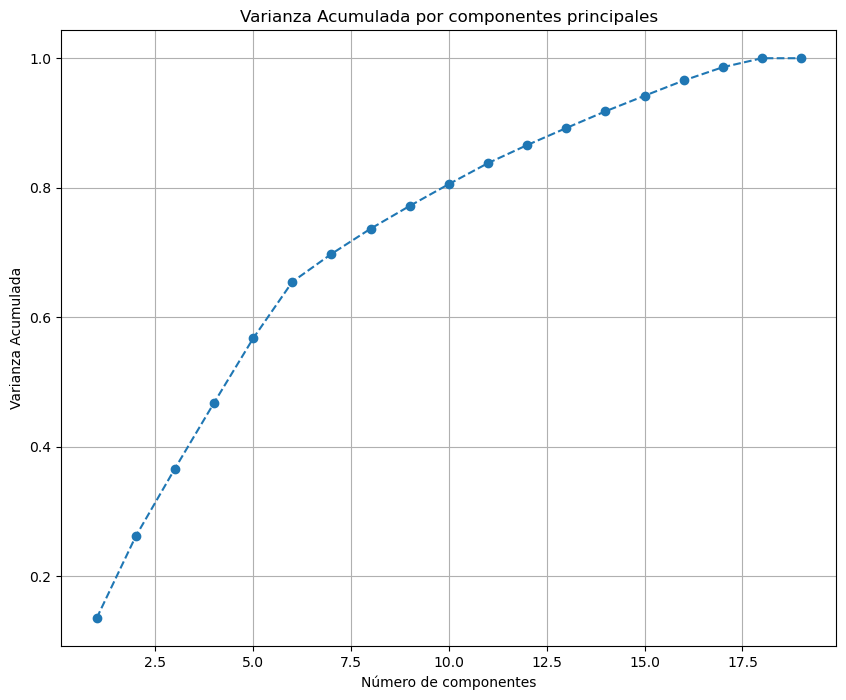

In [93]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Acumulada por componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

In [95]:
n_components_80 = (cumulative_variance_ratio <= 0.80).sum() + 1
print(f"Se necesitan {n_components_80} componentes para explicar al menos el 80% de la varianza.")

Se necesitan 10 componentes para explicar al menos el 80% de la varianza.


Se intenta quedarnos con 10 componentes (de 19 que se habían obtenido). Se vuelve a aplicar PCA.

In [98]:
n_components = 10
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(x)

In [100]:
# X_pca pasa a ser un dataframe
nombres_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=nombres_cols)

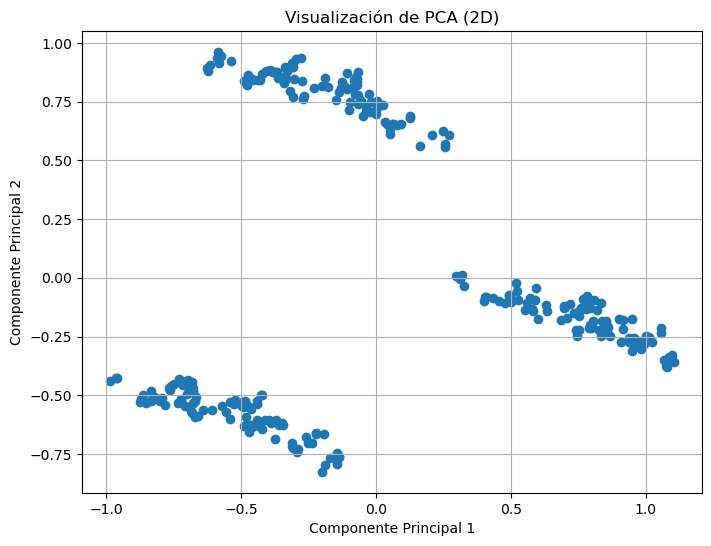

In [102]:
# Gráfico 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Visualización de PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

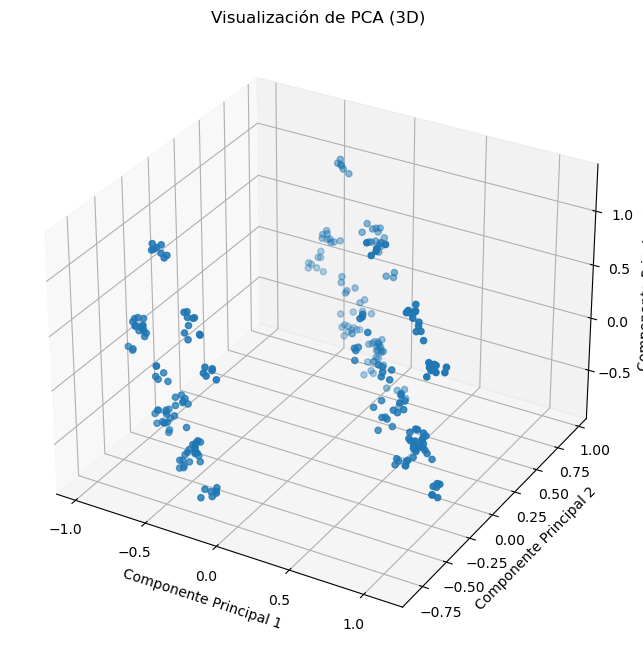

In [104]:
# Gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_title('Visualización de PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

### Isomap

ISOMAP con 6 vecinos y 4 componentes.

In [108]:
isomap = Isomap(n_neighbors=6, n_components=4)
X_reduced = isomap.fit_transform(x)

In [110]:
X_reduced.shape

(285, 4)

In [112]:
df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [114]:
df_isomap['tipoCultivo'] = y

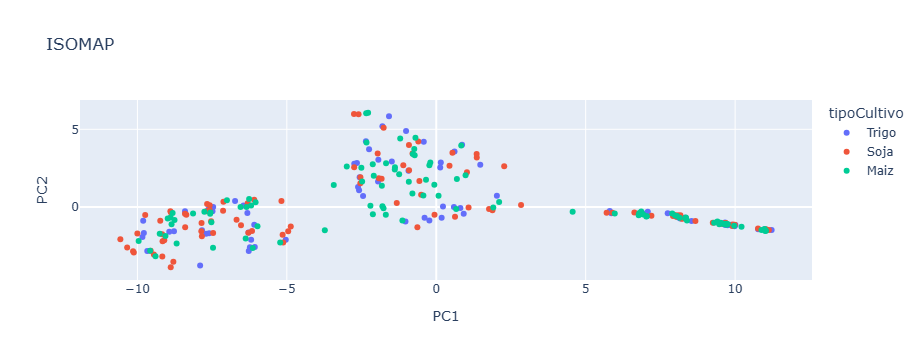

In [116]:
# Mostrar ISOMAP con y discreto
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color = y,
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

ISOMAP con 10 vecinos y 3 componentes.

In [118]:
isomap = Isomap(n_neighbors=10, n_components=3)
X_reduced = isomap.fit_transform(x)

In [121]:
X_reduced.shape

(285, 3)

In [123]:
df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])

In [125]:
df_isomap['tipoCultivo'] = y

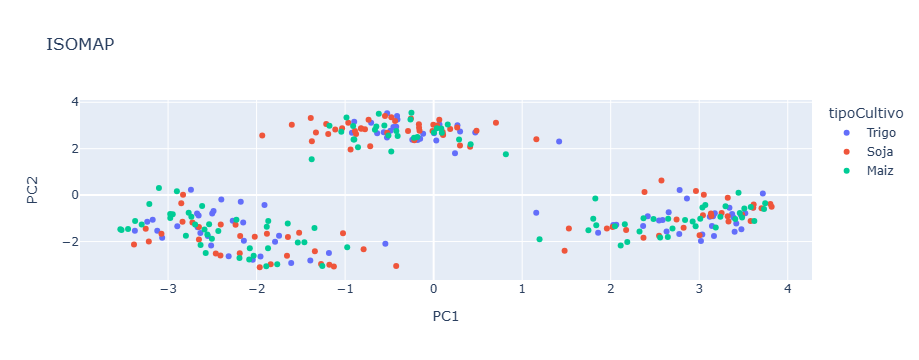

In [127]:
# Mostrar ISOMAP con y discreto
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color = y,
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

### TSNE

In [129]:
from sklearn.preprocessing import LabelEncoder

In [131]:
# Codificar a números SOLO para colorear
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = le.classes_
classes

array(['Maiz', 'Soja', 'Trigo'], dtype=object)

t-SNE con perplexity=5, n_iter=500, n_comp=2


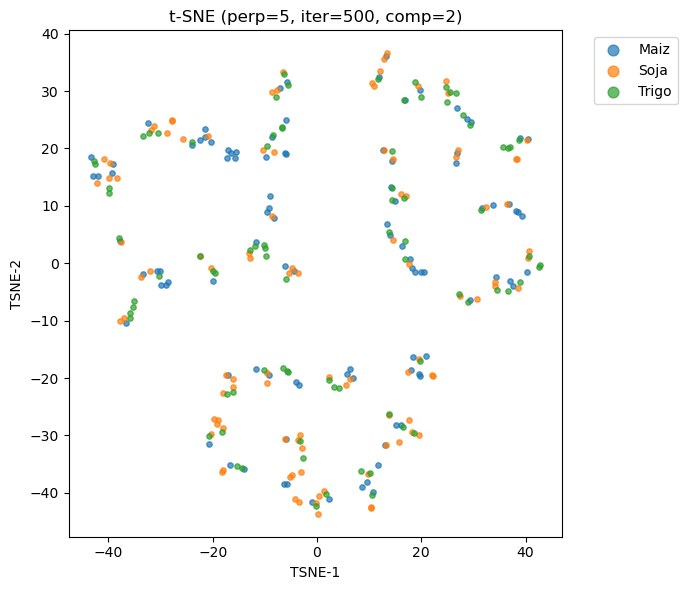

t-SNE con perplexity=5, n_iter=500, n_comp=3


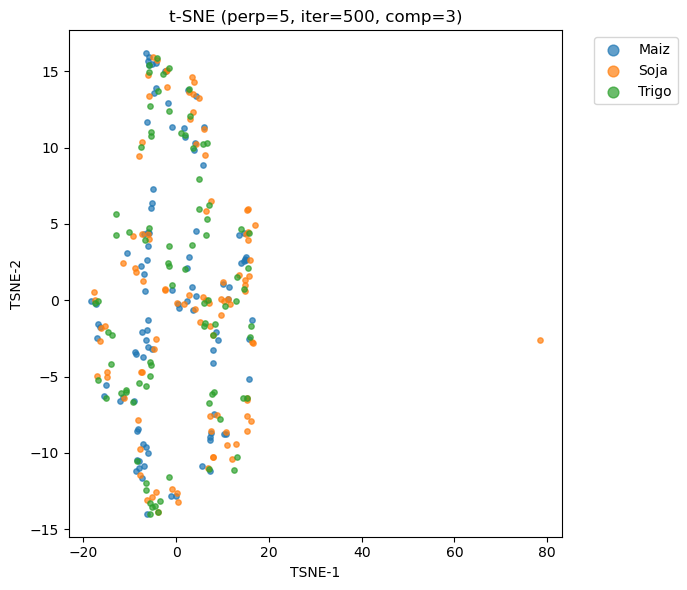

t-SNE con perplexity=5, n_iter=1000, n_comp=2


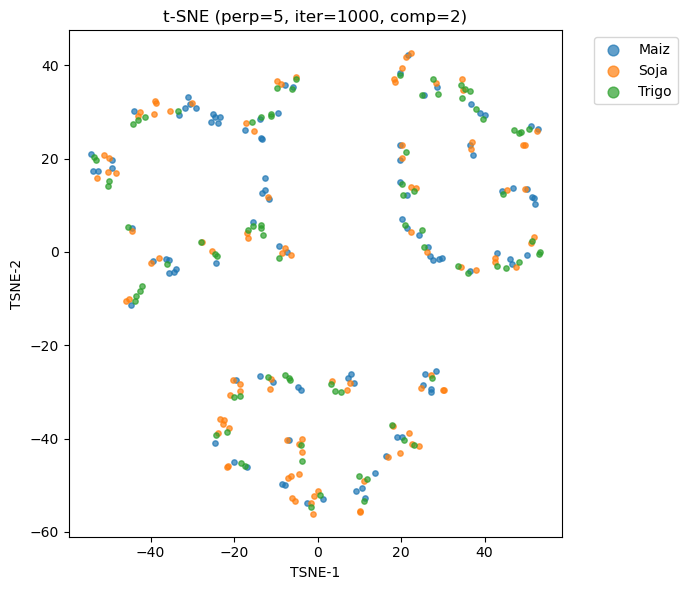

t-SNE con perplexity=5, n_iter=1000, n_comp=3


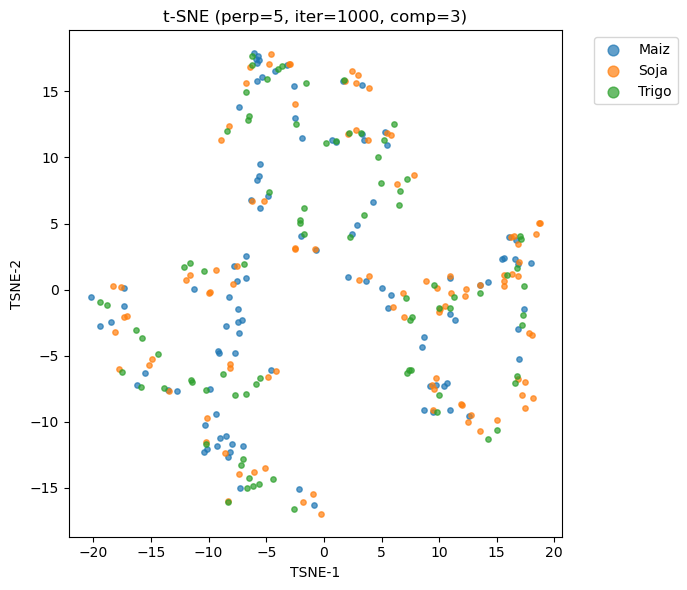

t-SNE con perplexity=5, n_iter=2000, n_comp=2


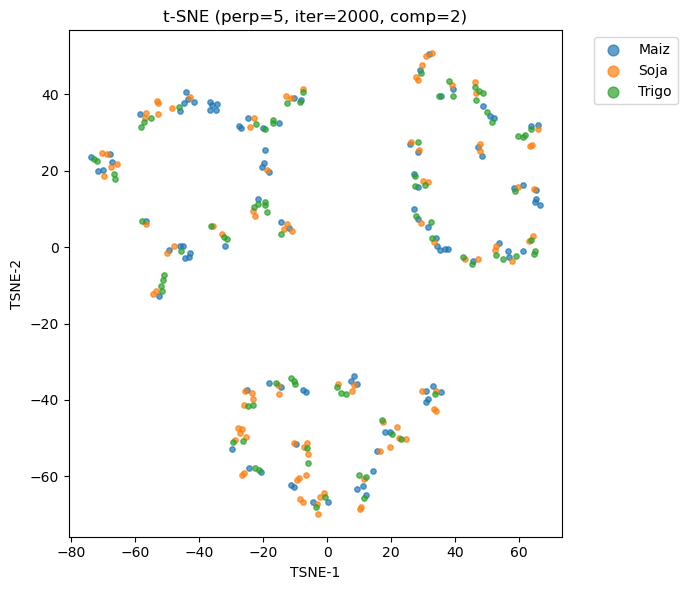

t-SNE con perplexity=5, n_iter=2000, n_comp=3


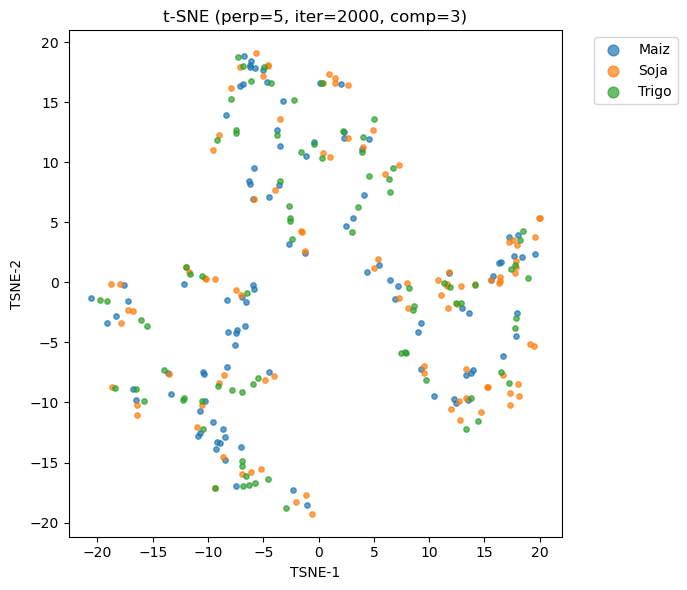

t-SNE con perplexity=15, n_iter=500, n_comp=2


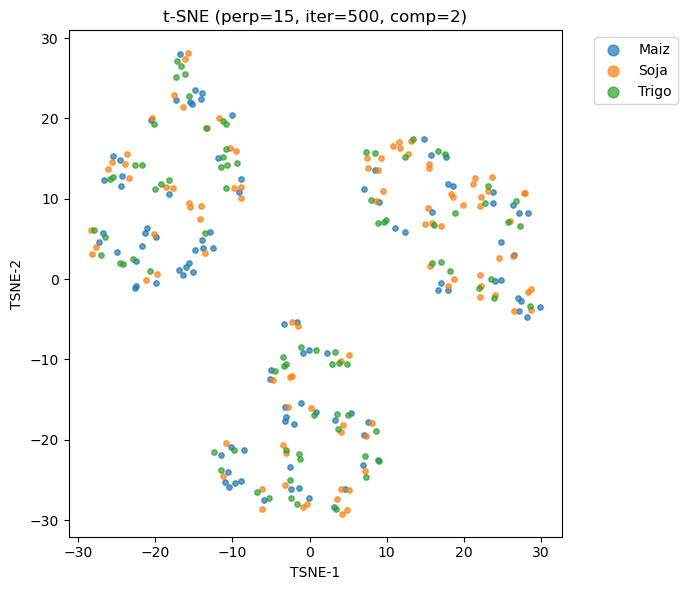

t-SNE con perplexity=15, n_iter=500, n_comp=3


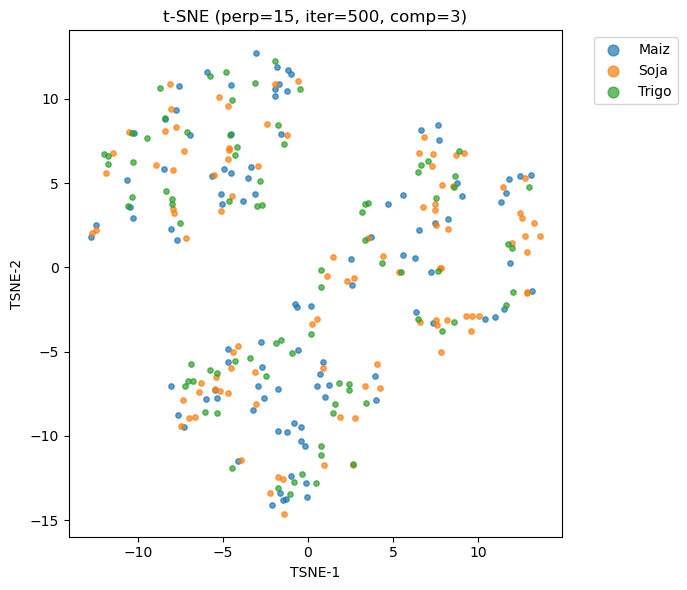

t-SNE con perplexity=15, n_iter=1000, n_comp=2


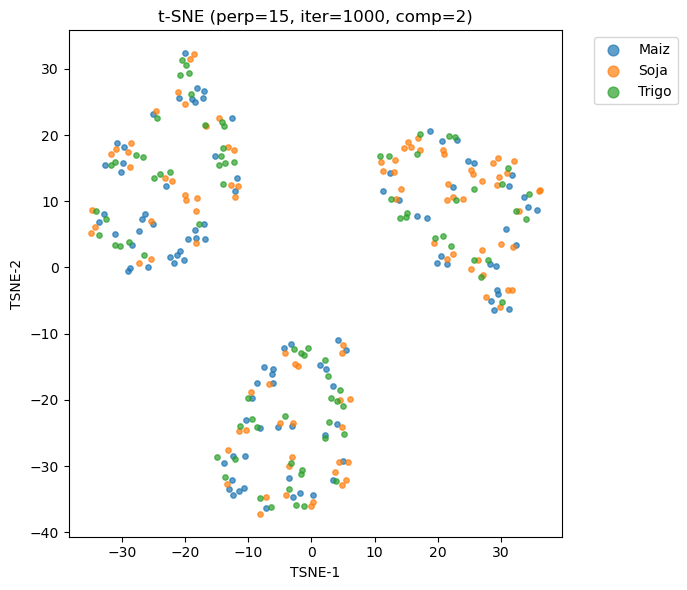

t-SNE con perplexity=15, n_iter=1000, n_comp=3


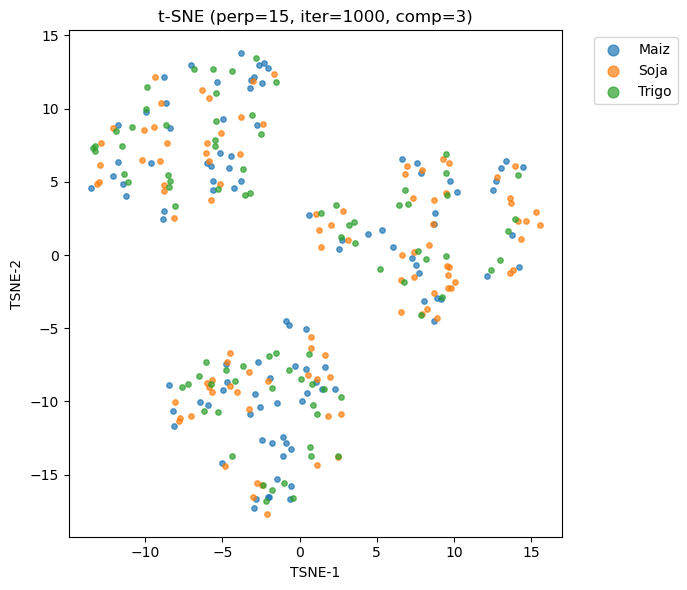

t-SNE con perplexity=15, n_iter=2000, n_comp=2


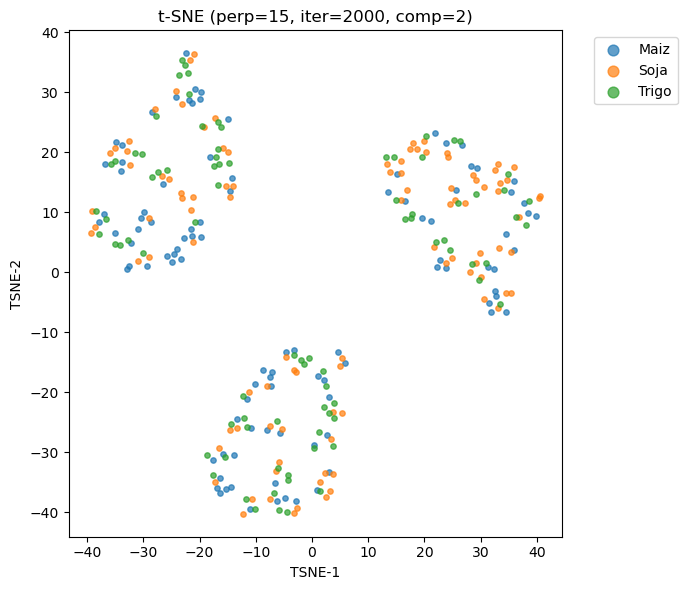

t-SNE con perplexity=15, n_iter=2000, n_comp=3


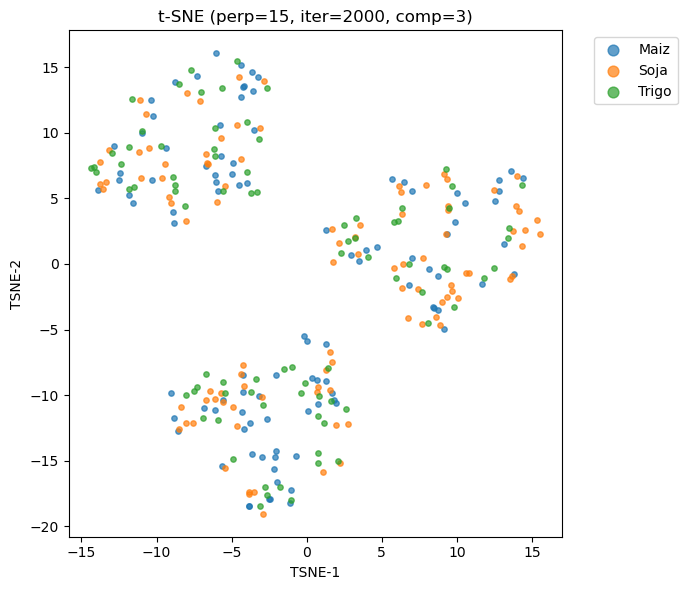

t-SNE con perplexity=30, n_iter=500, n_comp=2


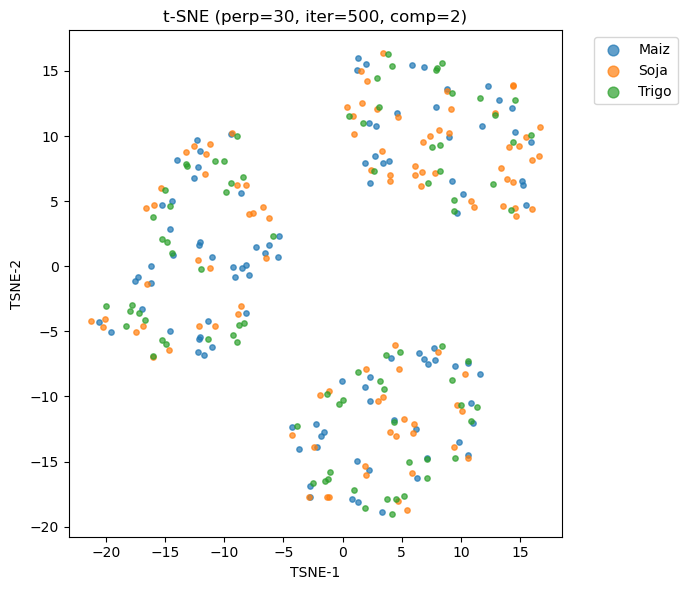

t-SNE con perplexity=30, n_iter=500, n_comp=3


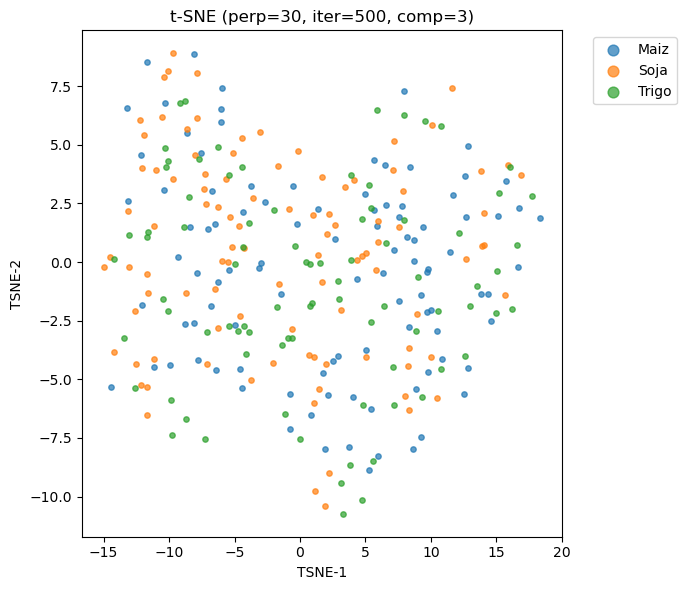

t-SNE con perplexity=30, n_iter=1000, n_comp=2


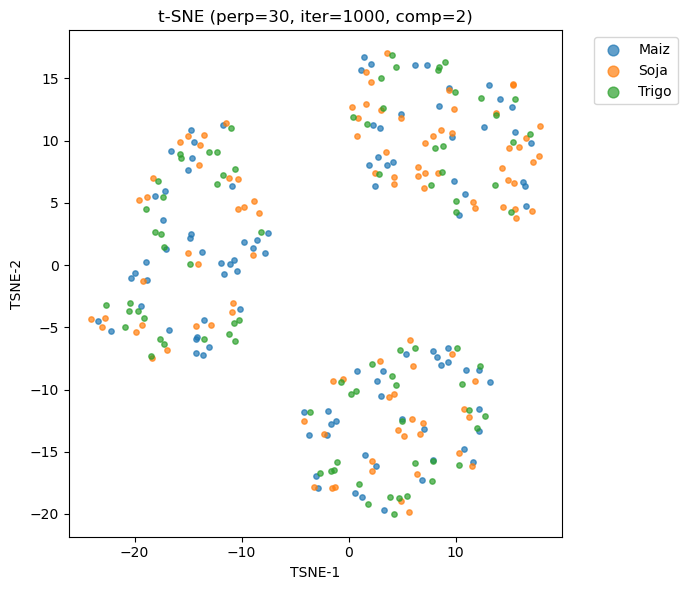

t-SNE con perplexity=30, n_iter=1000, n_comp=3


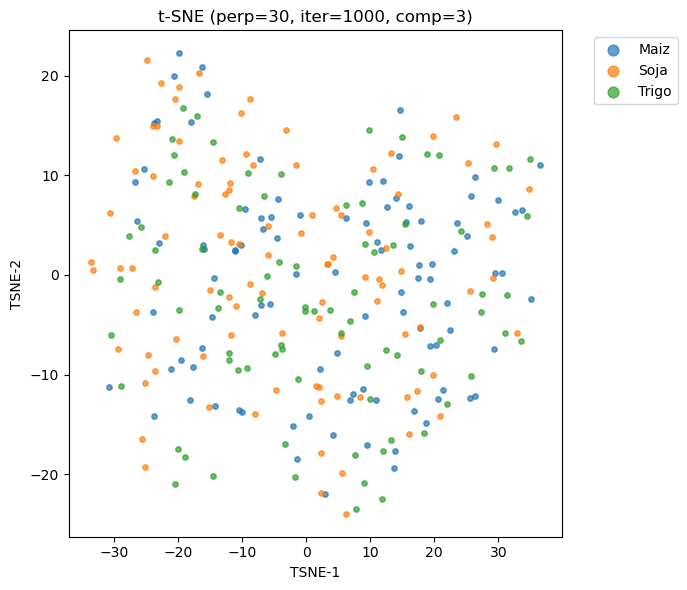

t-SNE con perplexity=30, n_iter=2000, n_comp=2


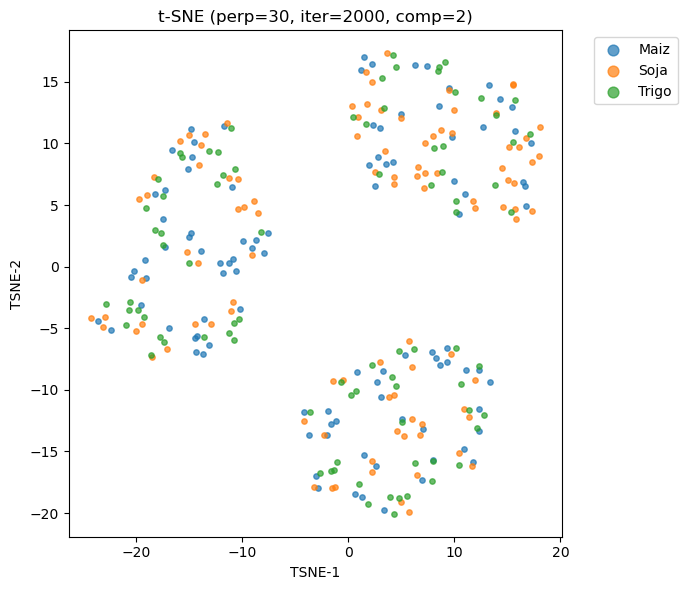

t-SNE con perplexity=30, n_iter=2000, n_comp=3


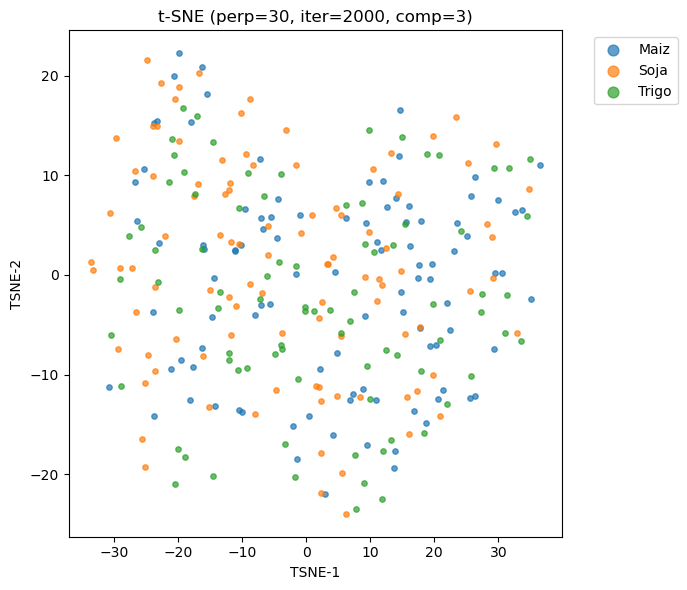

t-SNE con perplexity=50, n_iter=500, n_comp=2


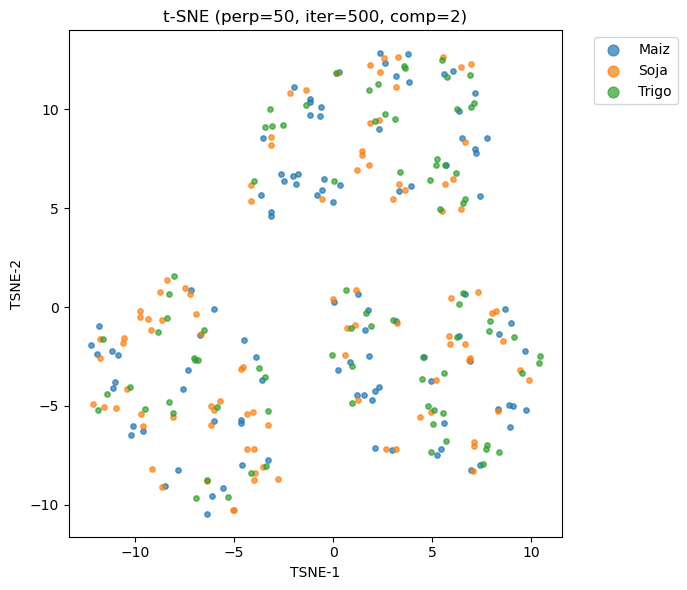

t-SNE con perplexity=50, n_iter=500, n_comp=3


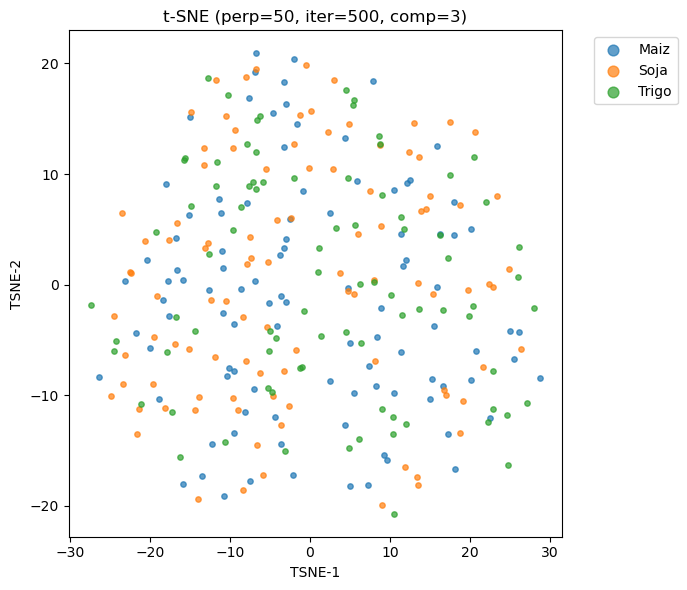

t-SNE con perplexity=50, n_iter=1000, n_comp=2


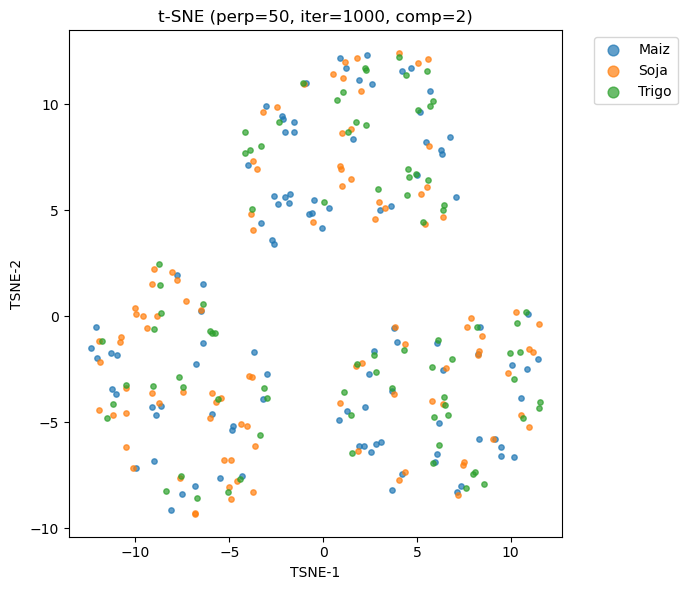

t-SNE con perplexity=50, n_iter=1000, n_comp=3


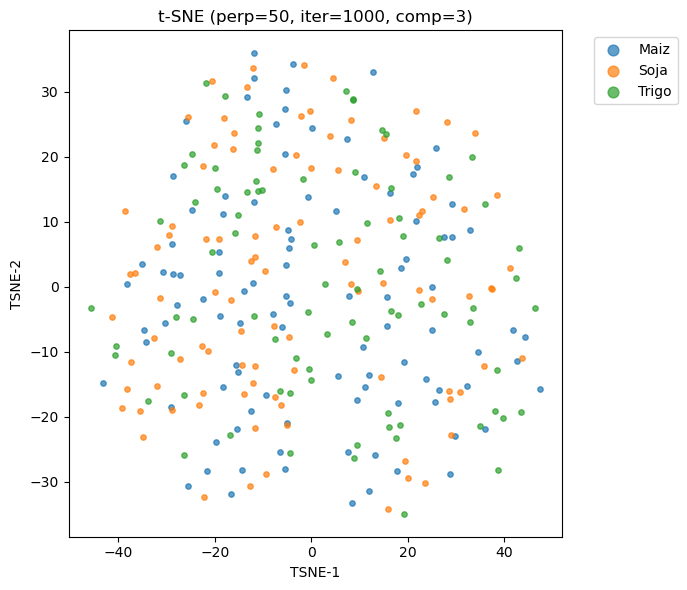

t-SNE con perplexity=50, n_iter=2000, n_comp=2


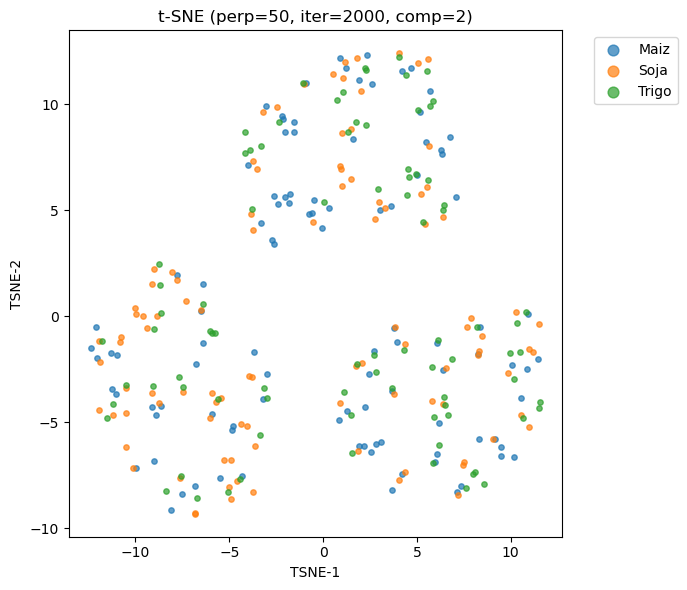

t-SNE con perplexity=50, n_iter=2000, n_comp=3


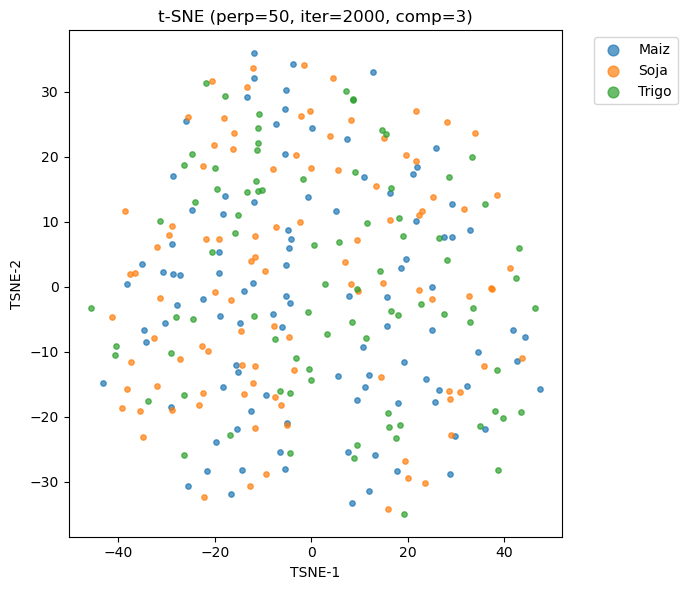

In [133]:
perplexities = [5, 15, 30, 50]
n_iters = [500, 1000, 2000]
components_list = [2, 3]  # probamos 2D y 3D

for perp in perplexities:
    for n_iter in n_iters:
        for n_comp in components_list:
            print(f"t-SNE con perplexity={perp}, n_iter={n_iter}, n_comp={n_comp}")
            
            tsne = TSNE(
                n_components=n_comp,
                perplexity=perp,
                n_iter=n_iter,
                init="pca",
                learning_rate="auto",
                random_state=42
            )
            x_emb = tsne.fit_transform(x)

            # Si usamos n_comp=3, graficamos solo las 2 primeras dimensiones
            plt.figure(figsize=(7,6))
            for class_idx, class_name in enumerate(classes):
                mask = (y_enc == class_idx)
                plt.scatter(x_emb[mask,0], x_emb[mask,1],
                            s=15, alpha=0.7, label=class_name)
            plt.legend(markerscale=2, bbox_to_anchor=(1.05,1), loc='upper left')
            plt.title(f"t-SNE (perp={perp}, iter={n_iter}, comp={n_comp})")
            plt.xlabel("TSNE-1"); plt.ylabel("TSNE-2")
            plt.tight_layout()
            plt.show()